## 🙋‍♂️ Important Note: You Don’t Need to Understand Everything Right Away

It’s completely **normal** for many of the concepts here (like cointegration, Poisson, walk-forward, etc.) to sound advanced or unfamiliar.

🎯 **The goal right now isn’t to master them**, but to build a reference map.
This guide is meant to help you **get your bearings**, know what to look for, and how to connect ideas later on.

🧭 Think of this content as a **toolbox** or a menu of strategies.
Over time, you’ll pick one, test it, make mistakes, and gradually understand each piece better.

---

# 🧠 Methodology for Creating an Algorithmic Trading Strategy

## 📌 Introduction

**Algorithmic trading** is a rule-based approach that uses mathematics, statistics, and programming to make decisions in financial markets. Instead of relying solely on human judgment, you build **automated strategies** that can analyze data, identify opportunities, and execute trades systematically.

Designing an algorithmic strategy isn’t just about having a good idea — it requires a **clear methodology** to develop, test, and optimize that idea in a structured and repeatable way.

---

## 🔁 General Development Stages

A typical methodology for creating an algorithmic trading strategy can be divided into the following stages:

1. **Import necessary libraries**
2. **Formulate the strategy / hypothesis**
3. Collect data (market data, fundamentals, etc.)
4. Clean and prepare the data
5. Implement the algorithm
6. Simulate it (backtesting)
7. Evaluate performance
8. Optimize and fine-tune parameters
9. Out-of-sample validation and *walk-forward analysis*
10. Real-time implementation

---

## 1️⃣ Importing Libraries

The first technical step is to import the **libraries** you’ll need. Libraries (or packages) are collections of pre-written functions, tools, and structures that help you avoid "reinventing the wheel" and allow you to work more efficiently and professionally.


In [108]:
# ===========================================
# Import required libraries
# ===========================================

# Data manipulation and analysis
import pandas as pd  # For working with DataFrames
import numpy as np  # For numerical operations
import math  # For mathematical functions

# Date and time handling
from datetime import datetime, timedelta  # For working with dates and time ranges

# Visualization
import matplotlib.pyplot as plt  # For creating charts and visualizations

# Financial data APIs and data collection
import yfinance as yf  # Yahoo Finance API
from yahooquery import search  # To search for assets using YahooQuery

# MetaTrader 5
import MetaTrader5 as mt5  # To interact with the MetaTrader 5 terminal

# File system and environment variables
import os  # For interacting with the operating system
from dotenv import load_dotenv  # To load environment variables from a .env file

# JSON handling
import json  # For working with JSON data

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from arch.__future__ import reindexing
from arch import unitroot



Sure! Here's the full translation of your content into English, **with no emojis**, and with a corrected and accurate description of **High-Frequency Trading (HFT)** / Trend Following:

---

# Strategy Selection: The First Fundamental Step

Before collecting data or writing a single line of code, the most important task is to **decide the type of trading strategy you want to build**.

**Why?**

* Because **each type of strategy requires different kinds of data** (e.g., tick data vs. daily prices).
* Because **the statistical tools, tests, and validations vary** depending on the strategy.
* Because it provides clarity about the hypothesis you want to test and how to structure your algorithmic pipeline.

---

# Types of Strategies, Statistical Use, Required Data, and Examples

| Strategy                  | Statistical Involvement | Common Tests / Validations                              |
| ------------------------- | ----------------------- | ------------------------------------------------------- |
| **Scalping**              | Moderate                | Trade ratios, slippage, profit factor, Sharpe ratio     |
| **Statistical Arbitrage** | High                    | Cointegration, correlations, z-score                    |
| **Trend Following / HFT** | Moderate to High        | Robust backtesting, Sharpe ratio, walk-forward analysis |
| **Range Trading**         | Moderate                | Conditional probability, mean reversion                 |
| **Market Making**         | Very High               | Stochastic modeling, Monte Carlo, optimal control       |
| **Machine Learning**      | Very High               | Overfitting, cross-validation, error metrics            |

---

## 1. **Scalping**

**Description**:
Scalping is a very short-term strategy aimed at profiting from small price movements by executing many trades within seconds or minutes. It exploits micro-inefficiencies in price formation.

**Required data**:

* **Tick-level data** or **Level 2 order book** data.
* Execution times and latency.
* Market depth and spreads.

**Applied statistics**:

* Win rate, expected return, profit factor, intraday Sharpe ratio.
* Slippage and execution speed analysis.

**Strategy example**:

> Buy when the spread narrows below X points and there's a sudden increase in demand (order book imbalance). Exit after 3 seconds or at a 0.05% gain.

---

## 2. **Statistical Arbitrage**

**Description**:
Aims to profit from temporary price discrepancies between two assets that historically move together. The assumption is that if they diverge, they will eventually revert to their historical relationship.

**Required data**:

* Historical time series for both assets (synchronized prices).
* Adjusted prices (accounting for dividends, splits).

**Applied statistics**:

* Cointegration (Engle-Granger, Johansen).
* Z-score of price spread.
* Pearson and Spearman correlation.

**Strategy example**:

> Identify cointegration between Coca-Cola and Pepsi. When the z-score exceeds +2, short the expensive one and go long the cheaper one, expecting reversion.

---

Perfecto, ya te pillo. Aquí tienes una explicación clara y correcta sobre **HFT (High-Frequency Trading)**, sin confundirlo con otras estrategias.

---

## 3. High-Frequency Trading (HFT)

**Description:**
High-Frequency Trading (HFT) is a type of algorithmic trading that uses extremely fast and sophisticated technology to execute a large number of trades in fractions of a second. The goal is to capitalize on very small price inefficiencies or market microstructure opportunities before other participants can react.

**Data required:**

* Tick-level or even nanosecond-level data
* Full order book data (Level 2 or deeper)
* Ultra-low latency execution and network times

**Statistical methods and models:**

* Modeling order flow using Poisson or Hawkes processes
* Latency analysis and optimization
* Real-time risk and inventory control
* Execution performance metrics like fill rate and queue position

**Example strategy:**

> Submitting and canceling thousands of orders per second to maintain favorable queue priority and capture tiny spreads or arbitrage opportunities, all while managing inventory risk in real time.

---

¿Quieres que te lo ponga en formato tabla o que lo integre con el resto?


---

## 4. **Range Trading / Mean Reversion**

**Description**:
This strategy assumes that prices tend to revert to a mean after deviating. Ideal for sideways or non-trending markets.

**Required data**:

* Historical prices at daily or intraday resolution.
* Dispersion indicators (e.g., Bollinger Bands, RSI).

**Applied statistics**:

* Conditional probability of reversion.
* Mean reversion tests (ADF test).

**Strategy example**:

> Buy when the price falls below the lower Bollinger Band and the RSI is below 30. Sell when it returns to the mean.

---

## 5. **Market Making**

**Description**:
Involves providing liquidity by simultaneously posting buy and sell orders in the order book, profiting from the bid-ask spread.

**Required data**:

* Full order book (bid/ask levels).
* Latency and execution speed.
* Market depth.

**Applied statistics**:

* Poisson or Hawkes process modeling.
* Optimal inventory control.
* Monte Carlo simulations.

**Strategy example**:

> Post limit orders every 2 seconds at the best bid and ask. Cancel if not executed after a set time. Adjust quotes based on volatility.

---

## 6. **Machine Learning Strategies**

**Description**:
Uses ML algorithms to predict returns, price movements, or generate buy/sell signals based on multiple input features.

**Required data**:

* Historical data with technical indicators.
* Fundamental or alternative data (e.g., news sentiment).
* Structured dataset with features and target variable.

**Applied statistics**:

* Cross-validation techniques.
* Overfitting detection and regularization.
* Metrics: MAE, RMSE, F1-score, ROC AUC.

**Strategy example**:

> Train a Random Forest classifier to predict whether the price will rise tomorrow. Buy when the predicted probability exceeds 70%.

---

# Scientific Method as Inspiration

## Where to Find Strategy Ideas?

### Scientific Literature → Real Hypotheses, Statistical Models

* [Google Scholar](https://scholar.google.com/)
* [arXiv](https://arxiv.org/)
* [SSRN](https://www.ssrn.com/index.cfm/en/)
* [The Journal of Financial Data Science](https://www.pm-research.com/content/iijjfds)
* [QuantInsti Blog](https://blog.quantinsti.com/)
* [IEEE Xplore](https://ieeexplore.ieee.org/)
* [ScienceDirect](https://www.sciencedirect.com/)
* [JSTOR](https://www.jstor.org/) / [SpringerLink](https://link.springer.com/)

### Specialized Journals

* *The Journal of Portfolio Management*
* *Quantitative Finance*
* *Algorithmic Finance*

---

### Useful Keywords for Strategy Research

* `algorithmic trading`, `quantitative finance`
* `high-frequency trading`, `statistical arbitrage`
* `machine learning in finance`, `momentum strategy`
* `backtesting`, `financial time series`

**Advanced search example**:

```bash
"algorithmic trading" AND (mean reversion OR momentum) site:arxiv.org
```

---

## Interdisciplinary Reading = Creative Intuition

Non-financial sources can inspire innovative models for trading strategies:

* **Economics** → Market microstructure, incentives, efficiency.
* **Biology** → Population dynamics (e.g., predator-prey models).
* **Psychology** → Cognitive biases, herd behavior, decision theory.
* **Generative AI** → Sequential modeling, prediction, scenario generation.
* **Sociology** → Collective behavior, emergent patterns.
* **Climatology** → Extreme event prediction, noise and seasonality analysis.

> **Conclusion**: Before writing code, define your framework.
> Ask yourself what kind of market behavior you're trying to capture...
> then look for ways to model it using tools from multiple disciplines.

---





---

## Statistical Arbitrage Strategy

This strategy is based on identifying temporary price imbalances between two instruments that are normally highly correlated or have a long-term equilibrium relationship.

In this case:

* Due to the illiquidity of the direct PYG/ARS exchange, we use the **USD/PYG** and **USD/ARS** currency pairs instead.
* The hypothesis is that due to the cyclical nature of agricultural exports between Paraguay and Argentina, the exchange rates may exhibit mean-reverting behavior despite fundamental challenges.

### Initial Hypothesis

> *The hypothesis consists of the potential stationarity of the spread between USD/PYG and USD/ARS exchange rates, driven by cyclical agricultural export patterns and trade flows between Paraguay and Argentina. Despite fundamental issues affecting the Argentine Peso, such as inflation and economic instability, a new arbitrage opportunity could arise due to recent monetary stabilization policies under Javier Milei’s government and the adoption of a managed float (dirty float) exchange rate regime.*

### Logic behind the strategy:

1. Identify the **long-term equilibrium or cointegration** relationship between USD/PYG and USD/ARS exchange rates.
2. Calculate the **spread or price difference** and monitor for significant deviations from this equilibrium.
3. When the spread widens beyond a threshold, expect it to **revert to the mean**.
4. Execute trades accordingly:

   * If USD/PYG is undervalued relative to USD/ARS → **Buy USD/PYG, sell USD/ARS**.
   * If USD/PYG is overvalued → **Sell USD/PYG, buy USD/ARS**.

### Required data:

* Historical or real-time exchange rates for USD/PYG and USD/ARS.
* Economic indicators related to agricultural exports and trade flows (optional for deeper analysis).
* Information about monetary policy and currency regime changes.

### Common validations:

* Cointegration tests (Engle-Granger, Johansen).
* Calculation of z-score to define entry and exit thresholds.
* Backtesting including transaction costs and slippage.

---

💡 **Note:** This strategy can be seen as a form of cross-currency statistical arbitrage, potentially profitable given the new monetary policy regime and managed float system recently adopted by Argentina.

---





Sure! Here's the translation to English:

---

# Financial Data Importing: Methods and Providers

When working with financial data, especially for backtesting, analysis, or algorithmic trading, there are two main ways to **import data**:

---

## 1. Static Files (CSV)

A simple and common way is to **download CSV files**, which contain structured data about assets (stocks, indices, ETFs, etc.).
They are treated as text files that can be easily read with `pandas`:





In [109]:
# Load blue peso data
bluepeso = pd.read_csv("pesoblue_daily_usd.csv")

# Convert date column to datetime
bluepeso['category'] = pd.to_datetime(bluepeso['category'], format='%a %b %d %Y')

# Rename columns to standard names
bluepeso = bluepeso.rename(columns={'category': 'date', 'valor': 'price'})

# Set 'date' as index
bluepeso.set_index('date', inplace=True)

# Load Paraguayan peso data
peso_paraguayo = pd.read_csv("PYG_USD_daily1.csv")


# Keep only relevant columns
peso_paraguayo = peso_paraguayo.loc[:, ['Price', 'Date']]

# Convert date column to datetime
peso_paraguayo['Date'] = pd.to_datetime(peso_paraguayo['Date'], format='%m/%d/%Y')

# Rename columns to match
peso_paraguayo = peso_paraguayo.rename(columns={'Date': 'date', 'Price': 'price'})

# Convert comma decimal to float
#peso_paraguayo['price'] = peso_paraguayo['price'].str.replace(',', '.').astype(float)

# Set 'date' as index
peso_paraguayo.set_index('date', inplace=True)

# Get only dates present in both datasets
common_dates = bluepeso.index.intersection(peso_paraguayo.index)

# Filter both DataFrames to the common date range
bluepeso = bluepeso.loc[common_dates]
peso_paraguayo = peso_paraguayo.loc[common_dates]

# Display result
print("Blue peso (filtered):")
print(bluepeso.head())
print("\nParaguayan peso (filtered):")
print(peso_paraguayo.head())


Blue peso (filtered):
            price
date             
2017-05-19  16.11
2017-05-22  16.22
2017-05-23  16.28
2017-05-24  16.29
2017-05-26  16.34

Paraguayan peso (filtered):
               price
date                
2017-05-19  0.000178
2017-05-22  0.000180
2017-05-23  0.000178
2017-05-24  0.000178
2017-05-26  0.000177


# 📄 1. Financial APIs

To obtain real-time or historical data programmatically, **APIs (Application Programming Interfaces)** are used.

These usually require authentication via keys (API Keys), and each provider has its own logic, but they allow access to:

* Historical or real-time prices
* Fundamental data
* Index composition
* Tick-level prices



* **Tiingo**: Pricing ranges from \$10 to \$65 per month.

  * Covers stocks, ETFs, and foreign exchange markets.
  * Provides official data with dividend and split adjustments.
  * Tick and intraday data availability is limited.
  * Offers an API for easy access.
  * Recommended for users seeking simplicity and reliable data quality.

* **Polygon.io**: Monthly fees between \$29 and \$199.

  * Supports stocks, cryptocurrencies, and FX assets.
  * Delivers official data, including dividend and split adjustments.
  * Provides detailed tick-level and intraday data.
  * API access is available.
  * Suitable for heavy data users requiring tick-level information.

* **Quandl (Nasdaq Data Link)**: Free options available, with paid plans starting at \$50 per month.

  * Focuses on stocks and ETFs.
  * Offers official data with dividend and split adjustments.
  * Tick and intraday data are limited.
  * Includes API support.
  * Aggregates data from multiple sources like WIKI and EOD.

* **Bloomberg**: Costs start around \$2,000 monthly.

  * Provides comprehensive coverage of all asset classes.
  * Official, high-quality data with dividend and split adjustments.
  * Full tick and intraday data access.
  * API available but at a high cost.
  * Considered the institutional standard, often too expensive for retail traders.

* **Interactive Brokers (IBKR, professional account)**: No monthly fee plus \$1.5 per market data subscription.

  * Real stock market data.
  * Official data with dividend and split adjustments.
  * Tick and intraday data access is limited.
  * API availability is partial.
  * Ideal for execution and real-time market data integration.

* **Tickmill combined with MetaTrader**: Free access with an account.

  * Focus on CFDs including indices and FX.
  * Does not provide official data or adjustments for dividends/splits.
  * Tick and intraday data available but limited.
  * Access through scripting APIs.
  * Useful for technical trading strategies but less suitable for backtesting.

* **Alpaca Markets**: Free access for both paper trading and live accounts.

  * Offers stocks and ETFs data.
  * Official data is sourced via Polygon, including dividend and split adjustments.
  * Tick and intraday data fully available.
  * Provides a comprehensive API.
  * Good choice for US stock trading and automated trading bots.

* **Yahoo Finance**: Free of charge.

  * Covers stocks and ETFs.
  * Data is unofficial and may lack guarantees.
  * Dividend and split adjustments are inconsistent.
  * No tick or intraday data available.
  * API access is limited.
  * Suitable primarily for prototyping rather than live or arbitrage trading.



## Acquiring an API Token



## 🔐 Authentication in Financial APIs

### 🧾 Why is it necessary?

* Protection of sensitive data
* User authentication
* Legal compliance (e.g., PSD2, PCI-DSS)
* Fraud prevention

### 🔧 Common methods

* **API Key**: Simple, medium security
* **OAuth 2.0**: Token-based, high security, banking industry standard
* **JWT (JSON Web Token)**: Signed tokens, secure
* **Username + Password**: Sometimes combined with 2FA, less commonly used
* **Digital Certificates**: High security

### 🔄 Typical OAuth 2.0 flow

1. User logs in
2. Redirect to financial institution
3. Authorization → *Authorization code*
4. Exchange code for *Access Token*
5. Use the token to access the API



## Making Our First API Call

Now it's time to structure our API calls to MetaTrader5. 

We need the following information from the API:

* Price Information from NZD_USD



In [110]:
# ===========================================
# Load environment variables from .env file
# ===========================================
# Create a .env file in the same folder and include:
# MT5_LOGIN=12345678
# MT5_PWD=your_password
# This helps protect your credentials.
load_dotenv()

MT5_LOGIN = os.getenv('MT5_LOGIN')
MT5_PWD = os.getenv('MT5_PWD')

# ===========================================
# Initialize and connect to MetaTrader 5
# ===========================================
mt5.initialize()

# Log in to your MT5 account (make sure MetaTrader 5 is running and connected)
# Replace 'MetaQuotes-Demo' with your broker's server if needed
mt5.login(int(MT5_LOGIN), MT5_PWD, 'MetaQuotes-Demo')


# ===========================================
# Define time range for data request
# ===========================================
from_date = datetime(2015, 5, 19)
to_date = datetime(2025, 5, 19)


NZD_USD = mt5.copy_rates_range("NZDUSD", mt5.TIMEFRAME_D1, from_date,to_date)
# Convert to DataFrame
NZD_USD = pd.DataFrame(NZD_USD)

# Convert timestamp to datetime and rename
NZD_USD['date'] = pd.to_datetime(NZD_USD['time'], unit='s')

# Rename 'close' to 'price' and keep only needed columns
NZD_USD = NZD_USD.loc[:, ['date', 'close']].rename(columns={'close': 'price'})

# Set 'date' as index
NZD_USD.set_index('date', inplace=True)

common_dates = NZD_USD.index.intersection(peso_paraguayo.index)

NZD_USD = NZD_USD.loc[common_dates]

print("NZD_USD data:\n")
print(NZD_USD.head())

mt5.shutdown()

NZD_USD data:

              price
date               
2017-05-19  0.69216
2017-05-22  0.69935
2017-05-23  0.70076
2017-05-24  0.70438
2017-05-26  0.70460


True


## Adding Our Stocks Data to a Pandas DataFrame

The next thing we need to do is **add our stock's price and market capitalization to a pandas DataFrame**, using a common reference currency — **USD** in this case. Think of a DataFrame like the Python version of a spreadsheet. It stores tabular data.

By converting all values to USD, we ensure consistent comparisons across different markets, especially when stocks are priced in different local currencies. This is essential when analyzing companies from multiple countries or regions.

---


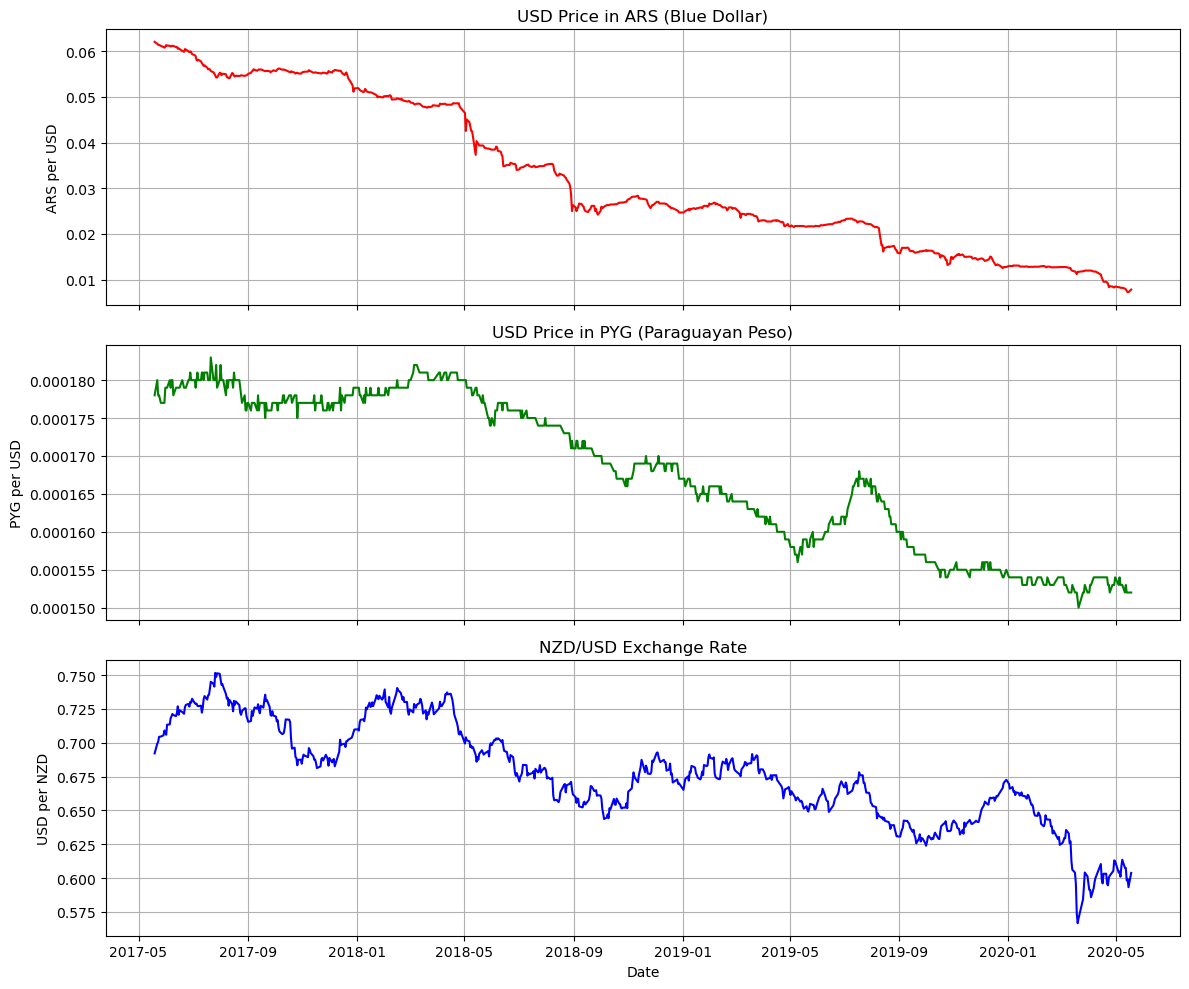

          PYG/USD     ARS/USD
count  729.000000  729.000000
mean    -8.693241   -3.571968
std      0.058973    0.555306
min     -8.804875   -4.927254
25%     -8.746606   -4.060443
50%     -8.685612   -3.637586
75%     -8.639361   -3.003204
max     -8.606024   -2.779440
PYG/USD    0
ARS/USD    0
dtype: int64
             PYG/USD   ARS/USD
date                          
2017-05-19 -8.633727 -2.779440
2017-05-22 -8.622554 -2.786245
2017-05-23 -8.633727 -2.789937
2017-05-24 -8.633727 -2.790551
2017-05-26 -8.639361 -2.793616


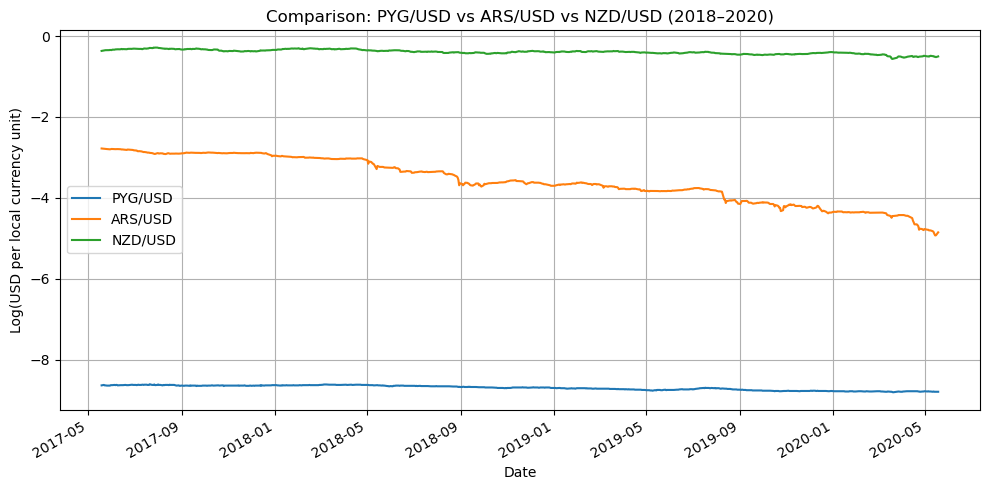

In [111]:


# Define time range for analysis
start_date = pd.to_datetime('2017-05-18')
end_date = pd.to_datetime('2020-05-18')

# Invert the exchange rate to get ARS/USD instead of USD/ARS
bluepeso['price'] = 1 / bluepeso['price']

# Take the log of ARS/USD prices
log_ARS_USD = np.log(bluepeso)
log_ARS_USD = log_ARS_USD.loc[start_date:end_date]
bluepeso = bluepeso.loc[start_date:end_date]

# Align datasets to a common date index
common_index = log_ARS_USD.index.intersection(peso_paraguayo.index).intersection(NZD_USD.index)

# Take the log of PYG/USD prices using common index
log_PYG_USD = np.log(peso_paraguayo.loc[common_index])
peso_paraguayo = peso_paraguayo.loc[start_date:end_date]

# Take the log of NZD/USD and restrict to the selected date range
log_NZD_USD = np.log(NZD_USD.loc[start_date:end_date])
NZD_USD = NZD_USD.loc[start_date:end_date]

# Plot the raw prices of each asset in separate subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# --- Subplot 1: USD price in ARS (Blue Dollar) ---
axes[0].plot(bluepeso.index, bluepeso['price'], color='red')
axes[0].set_title('USD Price in ARS (Blue Dollar)')
axes[0].set_ylabel('ARS per USD')
axes[0].grid(True)

# --- Subplot 2: USD price in PYG (Paraguayan Peso) ---
axes[1].plot(peso_paraguayo.index, peso_paraguayo['price'], color='green')
axes[1].set_title('USD Price in PYG (Paraguayan Peso)')
axes[1].set_ylabel('PYG per USD')
axes[1].grid(True)

# --- Subplot 3: NZD/USD price ---
axes[2].plot(NZD_USD.index, NZD_USD['price'], color='blue')
axes[2].set_title('NZD/USD Exchange Rate')
axes[2].set_ylabel('USD per NZD')
axes[2].set_xlabel('Date')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


# Combine all series into one DataFrame
y = pd.concat([
    log_ARS_USD['price'],
    log_PYG_USD['price'],
    log_NZD_USD['price']
], axis=1)

# Rename columns
y.columns = ['ARS/USD', 'PYG/USD', 'NZD/USD']

# Check summary statistics and missing values
print(y[['PYG/USD', 'ARS/USD']].describe())
print(y[['PYG/USD', 'ARS/USD']].isna().sum())
print(y[['PYG/USD', 'ARS/USD']].dropna().head())

# Plot comparison of log exchange rates
y[['PYG/USD', 'ARS/USD', 'NZD/USD']].plot(figsize=(10, 5))
plt.title('Comparison: PYG/USD vs ARS/USD vs NZD/USD (2018–2020)')
plt.xlabel('Date')
plt.ylabel('Log(USD per local currency unit)')
plt.grid(True)
plt.legend(['PYG/USD', 'ARS/USD', 'NZD/USD'])
plt.tight_layout()
plt.show()




Eigenvalues: [0.02555173 0.01836179 0.0010475 ]
Trace Statistic: [33.05258214 14.23502704  0.76193108]
Critical Values (90%, 95%, 99%):
 [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Johansen Cointegration Test Interpretation:

Rank 0 Trace Statistic: 33.05
Critical Values - 90%: 27.07, 95%: 29.80, 99%: 35.46
=> Reject H0 at 95%: Cointegration exists at rank 0

Rank 1 Trace Statistic: 14.24
Critical Values - 90%: 13.43, 95%: 15.49, 99%: 19.93
=> Reject H0 at 90%: Weak evidence of cointegration at rank 1

Rank 2 Trace Statistic: 0.76
Critical Values - 90%: 2.71, 95%: 3.84, 99%: 6.63
=> Fail to reject H0: No cointegration at rank 2


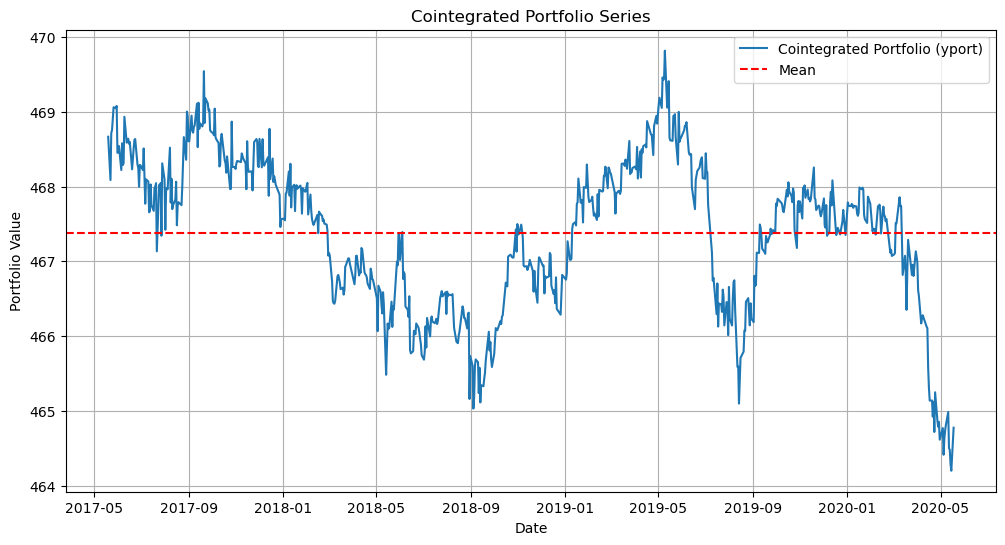

In [112]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Apply Johansen cointegration test
johansen_result = coint_johansen(y, det_order=0, k_ar_diff=1)

# Print results
print("\nEigenvalues:", johansen_result.eig)
print("Trace Statistic:", johansen_result.lr1)
print("Critical Values (90%, 95%, 99%):\n", johansen_result.cvt)

# Interpretación automática de los resultados trace test vs valor crítico
print("\nJohansen Cointegration Test Interpretation:")
for i in range(len(johansen_result.lr1)):
    trace_stat = johansen_result.lr1[i]
    crit_vals = johansen_result.cvt[i]
    
    print(f"\nRank {i} Trace Statistic: {trace_stat:.2f}")
    print(f"Critical Values - 90%: {crit_vals[0]:.2f}, 95%: {crit_vals[1]:.2f}, 99%: {crit_vals[2]:.2f}")
    
    if trace_stat > crit_vals[2]:
        print("=> Reject H0 at 99%: Cointegration exists at rank", i)
    elif trace_stat > crit_vals[1]:
        print("=> Reject H0 at 95%: Cointegration exists at rank", i)
    elif trace_stat > crit_vals[0]:
        print("=> Reject H0 at 90%: Weak evidence of cointegration at rank", i)
    else:
        print("=> Fail to reject H0: No cointegration at rank", i)


yport = np.dot(y, johansen_result.evec[:, 0])


dates = y.index  # Extraemos las fechas del índice

plt.figure(figsize=(12, 6))
plt.plot(dates, yport, label='Cointegrated Portfolio (yport)')
plt.axhline(y=np.mean(yport), color='red', linestyle='--', label='Mean')
plt.title('Cointegrated Portfolio Series')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()



Sure. Here's a more concise and professional version of your interpretation in English, using Markdown formatting and no emojis:

---

### **Johansen Cointegration Test Interpretation**

Each row in the test corresponds to a hypothesis test on the cointegration rank:

* **H₀ (Rank *r*)**: The number of cointegrating relationships is ≤ *r*

The test proceeds sequentially from rank 0 to the number of variables minus 1.

---

#### **Rank 0**

* **H₀**: No cointegration (r = 0)
* **Trace statistic**: 33.05
* **Critical values**: 90% = 27.07, 95% = 29.80, 99% = 35.46

**Result**:
33.05 > 29.80 → Reject H₀ at the 95% level.
→ There is **at least one cointegrating relationship**.

---

#### **Rank 1**

* **H₀**: At most one cointegration relationship (r ≤ 1)
* **Trace statistic**: 14.24
* **Critical values**: 90% = 13.43, 95% = 15.49, 99% = 19.93

**Result**:
14.24 > 13.43 but < 15.49 → Reject H₀ at 90% but not at 95%.
→ **Weak evidence for a second cointegrating relationship**.

---

#### **Rank 2**

* **H₀**: At most two cointegration relationships (r ≤ 2)
* **Trace statistic**: 0.76
* **Critical values**: 90% = 2.71, 95% = 3.84, 99% = 6.63

**Result**:
0.76 < 2.71 → Fail to reject H₀.
→ **No evidence of a third cointegrating relationship**.

---

### **Conclusion**

There is strong evidence of **one cointegrating vector**, with **some weak evidence for a second**. A VECM with **cointegration rank = 1** is appropriate for modeling these series.


We observe a potential mean-reverting behavior in the selected time series and will analyze the possibility of using them in a mean reversion strategy. However, we will first attempt to verify whether a pairs trading strategy could yield better results.


C:\Users\jango\AppData\Local\Temp\ipykernel_26284\4016069019.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]



--- (log)PYG/USD - (log)ARS/USD ---
ADF Test:
Statistic: -2.0210741164183683
P-value: 0.2774099555706444
Residuals are not stationary (fail to reject null hypothesis).

Hurst Exponent:
H: 0.4335538791442931
Series shows mean-reverting behavior.

Variance Ratio Test:
Variance Ratio: 0.644343508849079
P-value: 1.4144241333724494e-12
Variance ratio suggests mean reversion.


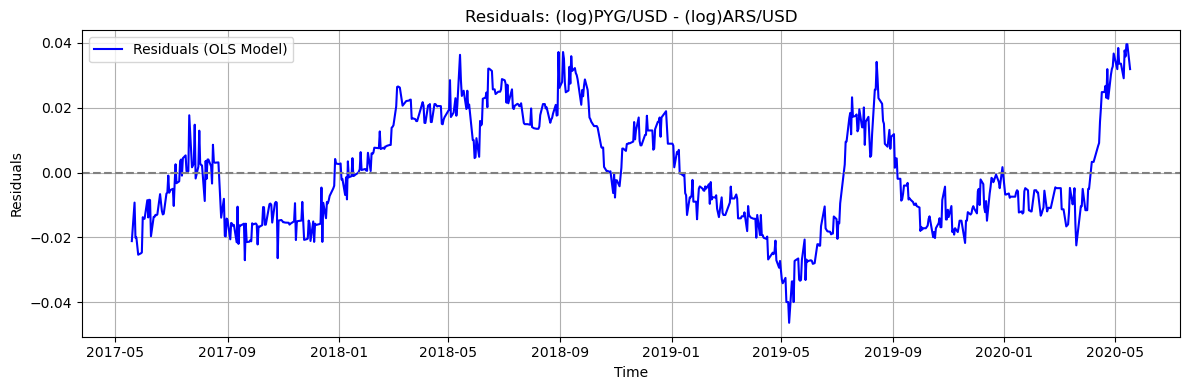

C:\Users\jango\AppData\Local\Temp\ipykernel_26284\4016069019.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]



--- (log)PYG/USD - (log)NZD/USD ---
ADF Test:
Statistic: -2.313360569126835
P-value: 0.1676951224871704
Residuals are not stationary (fail to reject null hypothesis).

Hurst Exponent:
H: 0.4139593674439505
Series shows mean-reverting behavior.

Variance Ratio Test:
Variance Ratio: 0.8564967399695026
P-value: 0.00024756285772364883
Variance ratio suggests mean reversion.


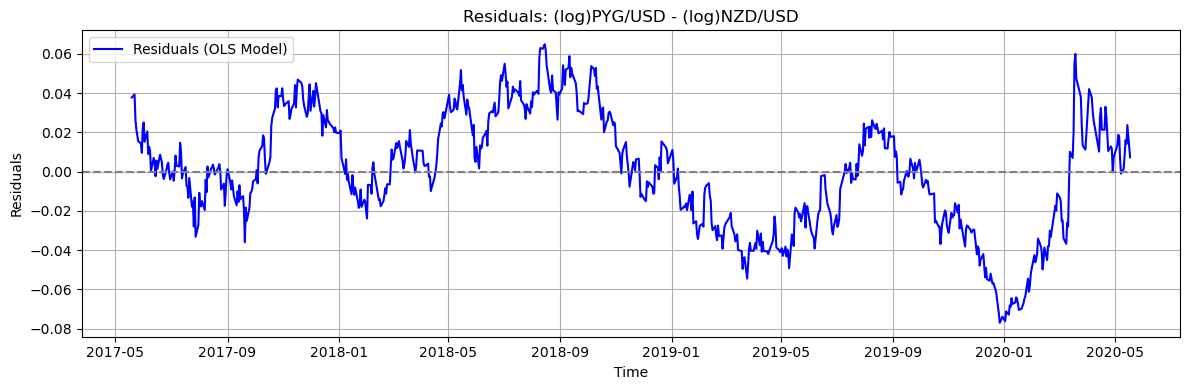

C:\Users\jango\AppData\Local\Temp\ipykernel_26284\4016069019.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]



--- (log)ARS/USD - (log)NZD/USD ---
ADF Test:
Statistic: -3.464871894624521
P-value: 0.008936441703314776
Residuals are stationary (reject null hypothesis of unit root).

Hurst Exponent:
H: 0.4830034979902004
Series shows mean-reverting behavior.

Variance Ratio Test:
Variance Ratio: 1.0060958072359003
P-value: 0.8925030043624484
Variance ratio suggests momentum.


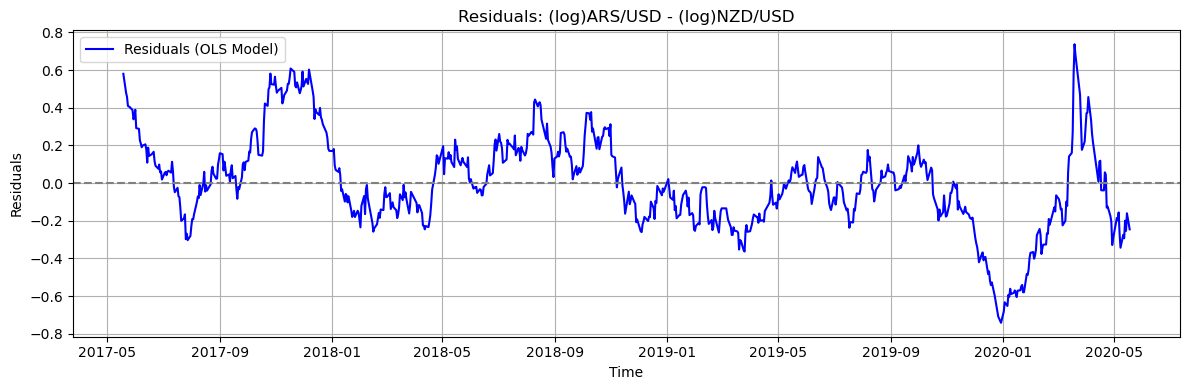

C:\Users\jango\AppData\Local\Temp\ipykernel_26284\4016069019.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]



--- PYG/USD - ARS/USD ---
ADF Test:
Statistic: -2.010375342595547
P-value: 0.2820424842164121
Residuals are not stationary (fail to reject null hypothesis).

Hurst Exponent:
H: 0.4510811862432315
Series shows mean-reverting behavior.

Variance Ratio Test:
Variance Ratio: 0.6238023283018135
P-value: 4.941380638001647e-12
Variance ratio suggests mean reversion.


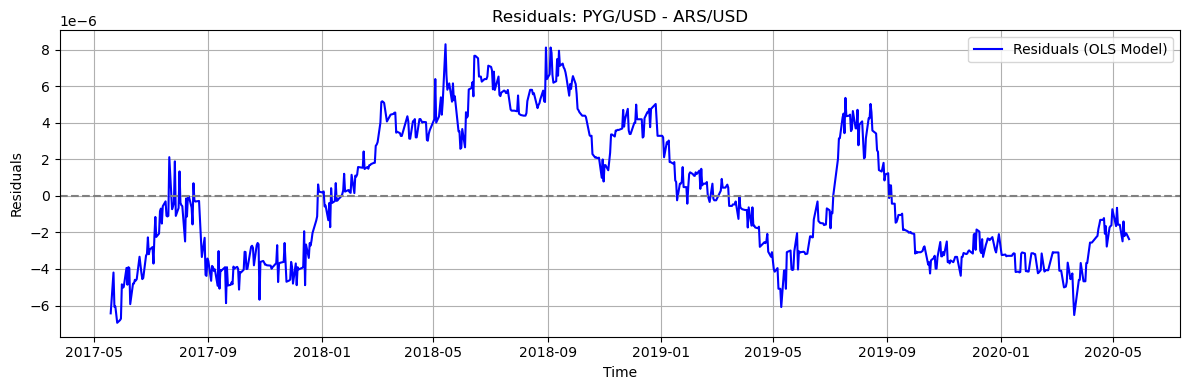

C:\Users\jango\AppData\Local\Temp\ipykernel_26284\4016069019.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]



--- PYG/USD - NZD/USD ---
ADF Test:
Statistic: -2.344160745246775
P-value: 0.1581203936772808
Residuals are not stationary (fail to reject null hypothesis).

Hurst Exponent:
H: 0.3956506617450621
Series shows mean-reverting behavior.

Variance Ratio Test:
Variance Ratio: 0.8367546087312386
P-value: 2.62312403771503e-05
Variance ratio suggests mean reversion.


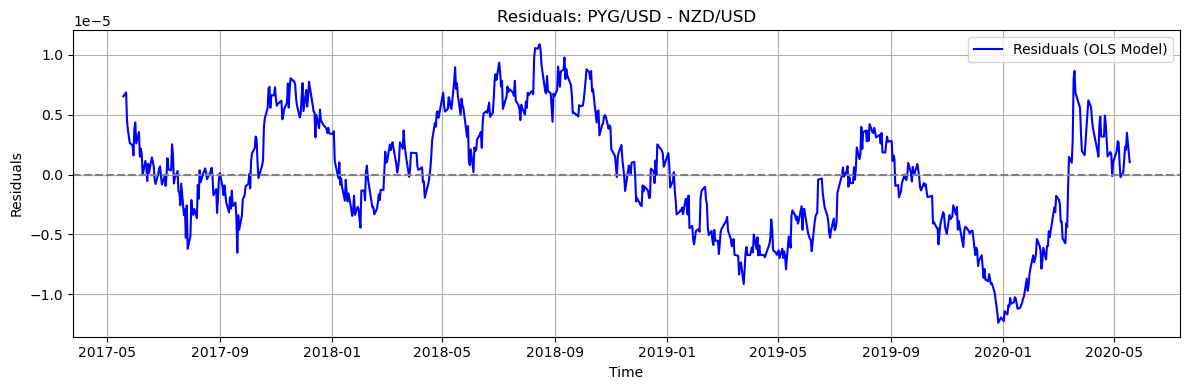

C:\Users\jango\AppData\Local\Temp\ipykernel_26284\4016069019.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]



--- ARS/USD - NZD/USD ---
ADF Test:
Statistic: -3.5306814427283637
P-value: 0.007233218618448748
Residuals are stationary (reject null hypothesis of unit root).

Hurst Exponent:
H: 0.4216644843279972
Series shows mean-reverting behavior.

Variance Ratio Test:
Variance Ratio: 0.9877558286066199
P-value: 0.7725800780354097
Variance ratio suggests mean reversion.


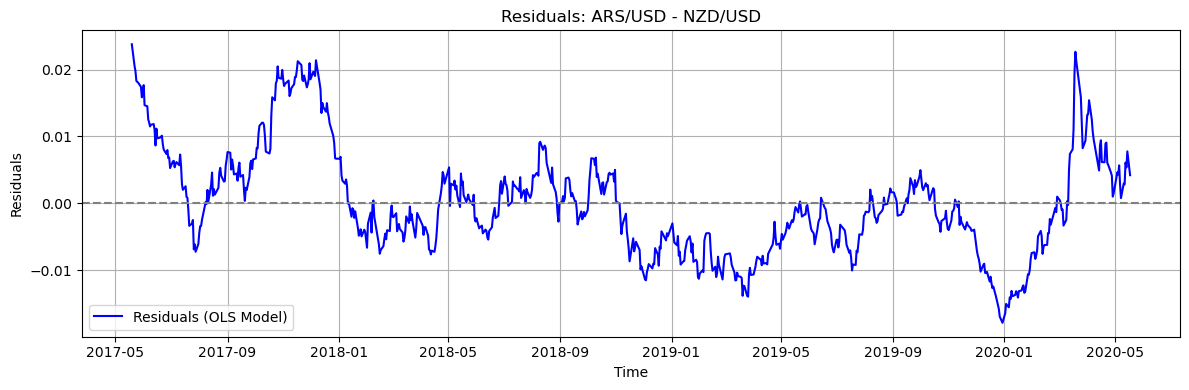

In [113]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from hurst import compute_Hc
from arch.unitroot import VarianceRatio

def analyze_pair(Y_series, X_series, pair_name):
    # --- Step 1: OLS Regression ---
    Y = Y_series['price']
    X = X_series['price']
    X_ols = sm.add_constant(X)
    
    model = sm.OLS(Y, X_ols).fit()
    hedge_ratio = model.params[1]
    residuals = model.resid        # OLS residuals

    print(f"\n--- {pair_name} ---")
    print("ADF Test:")
    adf_statistic, adf_p_value = adfuller(residuals)[:2]
    print(f"Statistic: {adf_statistic}")
    print(f"P-value: {adf_p_value}")
    if adf_p_value < 0.05:
        print("Residuals are stationary (reject null hypothesis of unit root).")
    else:
        print("Residuals are not stationary (fail to reject null hypothesis).")

    # --- Hurst Exponent ---
    residuals1 = [r - min(residuals) + 1 for r in residuals]
    H, c, _ = compute_Hc(residuals1, kind='price')
    print("\nHurst Exponent:")
    print(f"H: {H}")
    if H < 0.5:
        print("Series shows mean-reverting behavior.")
    elif H > 0.5:
        print("Series shows trending behavior.")
    else:
        print("Series behaves like a random walk.")

    # --- Variance Ratio ---
    vr_test = VarianceRatio(residuals1, lags=2)
    print("\nVariance Ratio Test:")
    print(f"Variance Ratio: {vr_test.vr}")
    print(f"P-value: {vr_test.pvalue}")
    if vr_test.vr < 1:
        print("Variance ratio suggests mean reversion.")
    elif vr_test.vr > 1:
        print("Variance ratio suggests momentum.")
    else:
        print("Variance ratio suggests random walk.")

    # --- Plot residuals ---
    plt.figure(figsize=(12, 4))
    plt.plot(residuals, label='Residuals (OLS Model)', color='blue')
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.title(f'Residuals: {pair_name}')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# --- Run for each pair ---
analyze_pair(log_PYG_USD, log_ARS_USD, '(log)PYG/USD - (log)ARS/USD')
analyze_pair(log_PYG_USD, log_NZD_USD, '(log)PYG/USD - (log)NZD/USD')
analyze_pair(log_ARS_USD, log_NZD_USD, '(log)ARS/USD - (log)NZD/USD')
analyze_pair(peso_paraguayo, bluepeso, 'PYG/USD - ARS/USD')
analyze_pair(peso_paraguayo, NZD_USD, 'PYG/USD - NZD/USD')
analyze_pair(bluepeso, NZD_USD, 'ARS/USD - NZD/USD')




### **Mean Reversion Analysis Summary**

Among the tested currency pairs, **only the (log) ARS/USD - (log) NZD/USD** combination has clearly demonstrated **mean-reverting behavior**, based on both the **ADF test** and supporting evidence from the **Hurst exponent** (although the Hurst value is close to 0.5, suggesting possible random walk characteristics).

Other combinations, such as **PYG/USD - ARS/USD**, show **potential for mean reversion**, but the statistical evidence is not yet conclusive.

To strengthen the robustness of these findings and evaluate the practical viability of a mean reversion strategy, it is recommended to:

* **Apply annual rolling windows** to segment the data,
* Use a **walk-forward validation approach** to test the stability of cointegration and reversion across time.

This method will help ensure the signals are not only statistically valid but also tradable under realistic market conditions.

---




In [114]:
# Assuming 'results.evec' is a numpy array and 'y3' is a pandas Series or DataFrame

evec_first = johansen_result.evec[:, 0]  # Extract the first eigenvector

# Multiply the eigenvector with the time series 'y3', repeat the eigenvector to match the shape of y3
# and sum the result across the specified axis (axis=1) to get 'yport'
yport = np.sum(np.tile(evec_first, (y.shape[0], 1)) * y, axis=1)

# Create the lagged version of 'yport' (equivalent to lag(yport, 1) in MATLAB)
ylag = pd.Series(yport).shift(1)

# Calculate deltaY (the difference between 'yport' and its lagged version)
deltaY = yport - ylag

# Remove the first value, which is NaN due to the lag
deltaY = deltaY[1:]
ylag = ylag.dropna()  # Drop the NaN value from the lagged series

# Fit an OLS (Ordinary Least Squares) regression model
X = sm.add_constant(ylag)  # Add the constant term (intercept) to the independent variable
model = sm.OLS(deltaY, X)  # Create the OLS model with deltaY as the dependent variable and ylag as the independent variable
results_ols = model.fit()  # Fit the model

# Get the hedge ratio (beta[1]), which represents the coefficient for the lagged series
hedge_ratio = results_ols.params[0]

# Calculate the half-life, which is the time it takes for the hedge ratio to halve
half_life = -np.log(2) / hedge_ratio

# Print the hedge ratio and the half-life in days
print(f'Hedge Ratio: {hedge_ratio}')
print(f'Half-Life: {half_life} days')


Hedge Ratio: -0.030740998994455322
Half-Life: 22.547971869260543 days


In [118]:
# Define the dependent and independent variables using logged prices
Y = log_ARS_USD['price']
X = log_NZD_USD['price']
X_ols = sm.add_constant(X)

# First OLS regression to obtain the hedge ratio between ARS and NZD
model = sm.OLS(Y, X_ols).fit()
hedge_ratio = model.params[1]

# Construct the cointegrated spread (synthetic portfolio)
y2 = y[['ARS/USD','NZD/USD']]
yport = y2['ARS/USD'] - hedge_ratio * y2['NZD/USD']

# Build the mean-reversion model: Δy = α + λ * y_{t-1}
ylag = pd.Series(yport).shift(1)  # Lagged version of the portfolio
deltaY = yport - ylag             # First difference (variation y)

# Remove the first NaN value caused by lagging
deltaY = deltaY[1:]
ylag = ylag.dropna()

# Convert lagged series to DataFrame with named column for regression
ylag_df = pd.DataFrame({'ylag': ylag})
X = sm.add_constant(ylag_df)

# Fit the AR(1) model to estimate the speed of mean reversion
model = sm.OLS(deltaY, X)
results_ols = model.fit()

# Extract lambda (the coefficient of ylag)
lambda_ = results_ols.params['ylag']

# Compute the half-life of mean reversion using the lambda coefficient
half_life = -np.log(2) / lambda_

# Display results
print(f'Lambda (speed of reversion): {lambda_}')
print(f'Half-Life: {half_life:.2f} days')




Lambda (speed of reversion): -0.02891536192494383
Half-Life: 23.97 days


C:\Users\jango\AppData\Local\Temp\ipykernel_26284\3539330497.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]


In [119]:

def moving_avg(x, window):
    return x.rolling(window=window).mean()

def moving_std(x, window):
    return x.rolling(window=window).std()

entryZscore = 1
exitZscore = 0
lookback = 20

# Suponemos que yport es un pandas Series
zScore = (yport - moving_avg(yport, lookback)) / moving_std(yport, lookback)

# Condiciones de entrada/salida
longsEntry = zScore < -entryZscore      # Entrar en largo
longsExit = zScore >= -exitZscore       # Salir de largo
shortsEntry = zScore > entryZscore      # Entrar en corto
shortsExit = zScore <= exitZscore       # Salir de corto

# Inicializar posiciones
numUnitsLong = pd.Series(np.nan, index=yport.index)
numUnitsShort = pd.Series(np.nan, index=yport.index)

numUnitsLong.iloc[0] = 0
numUnitsLong[longsEntry] = 1
numUnitsLong[longsExit] = 0
numUnitsLong = numUnitsLong.ffill()  # Rellenar valores perdidos

numUnitsShort.iloc[0] = 0
numUnitsShort[shortsEntry] = -1
numUnitsShort[shortsExit] = 0
numUnitsShort = numUnitsShort.ffill()

numUnits = numUnitsLong + numUnitsShort  # Total de unidades netas (zscore)


In [145]:
import numpy as np
import pandas as pd

# --- Kalman Filter Regression for Dynamic Hedge Ratio ---

def kalman_regression(x, y, delta=0.0001, Ve=0.001):
    """
    Perform Kalman Filter based regression (adaptive linear regression).
    
    Args:
        x: Independent variable (2D numpy array), shape (T, 1)
        y: Dependent variable (1D array), shape (T,)
        delta: State noise scaling factor (controls how much the coefficients are allowed to change)
        Ve: Observation noise variance

    Returns:
        beta: Coefficient estimates over time
        yhat: Fitted values
        e: Residuals
        Q: Measurement variance
    """
    x = np.hstack([x, np.ones((x.shape[0], 1))])  # Add constant term (intercept)
    yhat = np.full(y.shape, np.nan)
    e = np.full(y.shape, np.nan)
    Q = np.full(y.shape, np.nan)
    
    P = np.zeros((2, 2))                          # Initial error covariance matrix
    beta = np.full((2, x.shape[0]), np.nan)       # Store dynamic coefficients
    Vw = (delta / (1 - delta)) * np.eye(2)        # State noise covariance matrix
    beta[:, 0] = 0                                # Initial coefficients
    
    for t in range(len(y)):
        if t > 0:
            beta[:, t] = beta[:, t - 1]
            R = P + Vw
        else:
            R = P
        
        yhat[t] = x[t, :] @ beta[:, t]
        Q[t] = x[t, :] @ R @ x[t, :].T + Ve
        e[t] = y[t] - yhat[t]
        
        K = R @ x[t, :].T / Q[t]
        beta[:, t] = beta[:, t] + K * e[t]
        P = R - np.outer(K, x[t, :]) @ R

    return beta, yhat, e, Q

# --- Load and Prepare Data (Example with two log-price series) ---

# Replace this with your actual price series (log returns recommended)
# log_ARS_USD and log_NZD_USD should be numpy arrays or pandas Series of same length
# Assume they are log-prices already

# Asegúrate que x e y son vectores (1D)
x = log_ARS_USD.values.flatten()
y = log_NZD_USD.values.flatten()

# Obtén la última estimación del hedge ratio del Kalman filter
beta, yhat, e, Q = kalman_regression(x.reshape(-1, 1), y)
hedge_ratio = beta[0, :]  # ratio (puede cambiar en el tiempo)
intercept = beta[1, :]

# Calcula el spread (usando el último hedge ratio e intercept)
spread = y - hedge_ratio * x - intercept
spread = pd.Series(spread)  # ahora es 1D)

# Moving average and standard deviation functions
def moving_avg(x, window):
    return x.rolling(window=window).mean()

def moving_std(x, window):
    return x.rolling(window=window).std()

lookback = 20
entryZscore = 1
exitZscore = 0

# Calculate z-score
zScore = (spread - moving_avg(spread, lookback)) / moving_std(spread, lookback)

# --- Generate trading signals based on z-score thresholds (Bollinger Bands logic) ---

# Entry/exit signals
longsEntry = zScore < -entryZscore
longsExit = zScore >= -exitZscore
shortsEntry = zScore > entryZscore
shortsExit = zScore <= exitZscore

# Initialize positions
numUnitsLong = pd.Series(np.nan, index=spread.index)
numUnitsShort = pd.Series(np.nan, index=spread.index)

numUnitsLong.iloc[0] = 0
numUnitsLong[longsEntry] = 1
numUnitsLong[longsExit] = 0
numUnitsLong = numUnitsLong.ffill()

numUnitsShort.iloc[0] = 0
numUnitsShort[shortsEntry] = -1
numUnitsShort[shortsExit] = 0
numUnitsShort = numUnitsShort.ffill()

# Net position = long units + short units
numUnits = numUnitsLong + numUnitsShort

# --- Create Position Matrix (for both assets) ---

positions = pd.DataFrame(index=spread.index)
positions['NZD/USD'] = numUnits
positions['ARS/USD'] = -numUnits * hedge_ratio

# --- Calculate PnL and returns ---

# Prices
prices = pd.DataFrame({'NZD/USD': log_NZD_USD, 'ARS/USD': log_ARS_USD})
prices = prices.pct_change().fillna(0)

# Lag positions by 1 to avoid lookahead bias
positions_lagged = positions.shift(1)

# PnL: daily returns from positions
pnl = (positions_lagged * prices).sum(axis=1)

# Capital at risk (sum of absolute exposure)
capital = positions_lagged.abs().sum(axis=1)
ret = pnl / capital.replace(0, np.nan)  # Avoid divide by zero

# --- Results as DataFrame ---
results = pd.DataFrame({
    'pnl': pnl,
    'ret': ret,
    'zScore': zScore,
    'spread': spread
})

# Optional: plot performance
import matplotlib.pyplot as plt

results['cum_ret'] = results['ret'].cumsum()
results['cum_ret'].plot(title='Cumulative Return (Kalman + Bollinger)', figsize=(10, 5))
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


ValueError: If using all scalar values, you must pass an index

Empty DataFrame
Columns: [pnl, ret, zScore, spread]
Index: []


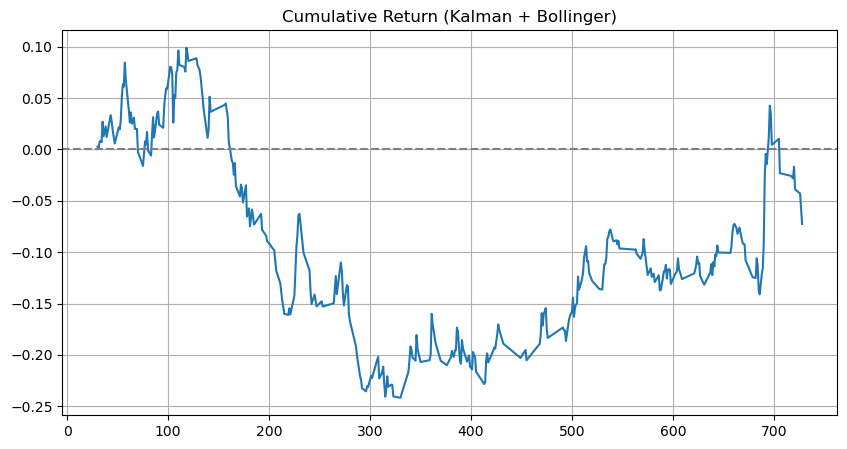

In [150]:
import numpy as np
import pandas as pd

# --- Kalman Filter Regression for Dynamic Hedge Ratio ---
def ensure_series(x, index):
    if isinstance(x, pd.Series):
        return x
    if isinstance(x, pd.DataFrame):
        x = x.iloc[:, 0]
    return pd.Series(x.values.flatten(), index=index)

def kalman_regression(x, y, delta=0.0001, Ve=0.001):
    x = np.hstack([x, np.ones((x.shape[0], 1))])  # Add intercept
    yhat = np.full(y.shape, np.nan)
    e = np.full(y.shape, np.nan)
    Q = np.full(y.shape, np.nan)
    
    P = np.zeros((2, 2))
    beta = np.full((2, x.shape[0]), np.nan)
    Vw = (delta / (1 - delta)) * np.eye(2)
    beta[:, 0] = 0
    
    for t in range(len(y)):
        if t > 0:
            beta[:, t] = beta[:, t - 1]
            R = P + Vw
        else:
            R = P
        
        yhat[t] = x[t, :] @ beta[:, t]
        Q[t] = x[t, :] @ R @ x[t, :].T + Ve
        e[t] = y[t] - yhat[t]
        
        K = R @ x[t, :].T / Q[t]
        beta[:, t] = beta[:, t] + K * e[t]
        P = R - np.outer(K, x[t, :]) @ R

    return beta, yhat, e, Q

# --- Load and Prepare Data ---

# Asegúrate que x e y sean vectores 1D
x = log_ARS_USD.values.flatten()
y = log_NZD_USD.values.flatten()

# Kalman filter regression
beta, yhat, e, Q = kalman_regression(x.reshape(-1, 1), y)
hedge_ratio = beta[0, :]  # dinámico
intercept = beta[1, :]

# Calcula spread
spread = y - hedge_ratio * x - intercept
spread = pd.Series(spread)  # 1D

# Funciones mov avg y std
def moving_avg(x, window):
    return x.rolling(window=window).mean()

def moving_std(x, window):
    return x.rolling(window=window).std()

lookback = 20
entryZscore = 1
exitZscore = 0

zScore = (spread - moving_avg(spread, lookback)) / moving_std(spread, lookback)

# Señales de trading
longsEntry = zScore < -entryZscore
longsExit = zScore >= -exitZscore
shortsEntry = zScore > entryZscore
shortsExit = zScore <= exitZscore

numUnitsLong = pd.Series(np.nan, index=spread.index)
numUnitsShort = pd.Series(np.nan, index=spread.index)

numUnitsLong.iloc[0] = 0
numUnitsLong[longsEntry] = 1
numUnitsLong[longsExit] = 0
numUnitsLong = numUnitsLong.ffill()

numUnitsShort.iloc[0] = 0
numUnitsShort[shortsEntry] = -1
numUnitsShort[shortsExit] = 0
numUnitsShort = numUnitsShort.ffill()

numUnits = numUnitsLong + numUnitsShort

positions = pd.DataFrame(index=spread.index)
positions['NZD/USD'] = numUnits
positions['ARS/USD'] = -numUnits * hedge_ratio


log_NZD_USD = ensure_series(log_NZD_USD, spread.index)
log_ARS_USD = ensure_series(log_ARS_USD, spread.index)

prices = pd.DataFrame({'NZD/USD': log_NZD_USD, 'ARS/USD': log_ARS_USD})
prices = prices.pct_change().fillna(0)

positions_lagged = positions.shift(1)

pnl = (positions_lagged * prices).sum(axis=1)
capital = positions_lagged.abs().sum(axis=1)
ret = pnl / capital.replace(0, np.nan)

results = pd.DataFrame({
    'pnl': pnl,
    'ret': ret,
    'zScore': zScore,
    'spread': spread
})

import matplotlib.pyplot as plt

results = results.dropna(subset=['ret'])
print(results[results['ret'].isna()])
results['cum_ret'] = results['ret'].cumsum()
results['cum_ret'].plot(title='Cumulative Return (Kalman + Bollinger)', figsize=(10,5))
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


In [ ]:

from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Combine into a 2D array
y = np.column_stack((log_ARS_USD,log_NZD_USD))

trainlen = 360
lookback = 66

hedgeRatio = np.full_like(y, np.nan)
numUnits = np.full(y.shape[0], np.nan)

for t in range(trainlen, len(y)):
    # Apply Johansen test on log prices over the training window
    res = coint_johansen((y[t - trainlen:t]), det_order=0, k_ar_diff=1)
    beta = res.evec[:, 0]  # First eigenvector (cointegrating vector)
    hedgeRatio[t, :] = beta


    # Compute portfolio spread over the lookback window
    y_window = y[t - lookback + 1:t + 1]
    spread = np.sum(y_window * beta.reshape(1, -1), axis=1)

    ma = spread.mean()
    std = spread.std()
    zScore = (spread[-1] - ma) / std

    numUnits[t] = -zScore  # Mean reversion strategy: go short when z > 0, long when z < 0

# Create full position matrix
positions = numUnits[:, None] * hedgeRatio * y
print(positions)
# Function to lag an array by 1 
def lag(arr):
    return np.vstack([np.full((1, arr.shape[1]), np.nan), arr[:-1]])

# Calculate PnL
pnl = np.nansum(lag(positions) * (y - lag(y)) / lag(y), axis=1)


# Calculate returns
capital = np.nansum(np.abs(lag(positions)), axis=1)
ret = pnl / capital

# Wrap up in DataFrame if desired
results = pd.DataFrame({
    'pnl': pnl,
    'ret': ret,
    'zScore': numUnits
})




[[         nan          nan]
 [         nan          nan]
 [         nan          nan]
 ...
 [  0.55512118  -1.16040989]
 [-24.13332025 -15.24202308]
 [ -1.47522453  -6.8711279 ]]
629    0.000018
630   -0.013984
631   -0.000609
632   -0.006184
633    0.001459
         ...   
724   -0.001313
725    0.012258
726    0.005079
727   -0.013541
728    0.022390
Name: ret, Length: 100, dtype: float64


C:\Users\jango\AppData\Local\Temp\ipykernel_26284\3066327281.py:42: RuntimeWarning: invalid value encountered in divide
  ret = pnl / capital


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# --- Parte 1: Kalman Filter para regresión adaptativa ---

def kalman_regression(x, y, delta=0.0001, Ve=0.001):
    x = np.hstack([x, np.ones((x.shape[0], 1))])  # añade columna de unos

    yhat = np.full(y.shape, np.nan) 
    e = np.full(y.shape, np.nan)
    Q = np.full(y.shape, np.nan)

    P = np.zeros((2, 2))
    beta = np.full((2, x.shape[0]), np.nan)
    Vw = (delta / (1 - delta)) * np.eye(2)
    beta[:, 0] = 0

    for t in range(len(y)):
        if t > 0:
            beta[:, t] = beta[:, t - 1]
            R = P + Vw
        else:
            R = P

        yhat[t] = x[t, :] @ beta[:, t]
        Q[t] = x[t, :] @ R @ x[t, :].T + Ve
        e[t] = y[t] - yhat[t]

        K = R @ x[t, :].T / Q[t]
        beta[:, t] = beta[:, t] + K * e[t]
        P = R - np.outer(K, x[t, :]) @ R

    return beta, yhat, e, Q
trainlen = 250
lookback = 20

y = np.column_stack((log_ARS_USD, log_NZD_USD))  # ahora y es un ndarray


hedgeRatio = np.full_like(y, np.nan)
numUnits = np.full(y.shape[0], np.nan)

for t in range(trainlen, len(y)):
    data = y[t - trainlen:t]
    res = coint_johansen(data, det_order=0, k_ar_diff=1)
    hedge = res.evec[:, 0]
    hedgeRatio[t, :] = hedge

    yport = np.sum(y[t - lookback + 1:t + 1] * hedge, axis=1)
    ma = yport.mean()
    mstd = yport.std()
    zScore = (yport[-1] - ma) / mstd
    numUnits[t] = -zScore
positions = numUnits[:, None] * hedgeRatio * y

def lag(mat, n=1):
    return np.vstack([np.full((n, mat.shape[1]), np.nan), mat[:-n]])

pnl = np.nansum(lag(positions, 1) * (y - lag(y, 1)) / lag(y, 1), axis=1)
ret = pnl / np.nansum(np.abs(lag(positions, 1)), axis=1)





[            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan         

C:\Users\jango\AppData\Local\Temp\ipykernel_26284\2122240199.py:61: RuntimeWarning: invalid value encountered in divide
  ret = pnl / np.nansum(np.abs(lag(positions, 1)), axis=1)
